# Decision Tree
 


###### About the data: 
###### Let’s consider a Company dataset with around 10 variables and 400 records. 
###### The attributes are as follows: 
######  Sales -- Unit sales (in thousands) at each location
######  Competitor Price -- Price charged by competitor at each location
######  Income -- Community income level (in thousands of dollars)
######  Advertising -- Local advertising budget for company at each location (in thousands of dollars)
######  Population -- Population size in region (in thousands)
######  Price -- Price company charges for car seats at each site
######  Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
######  Age -- Average age of the local population
######  Education -- Education level at each location
######  Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
######  US -- A factor with levels No and Yes to indicate whether the store is in the US or not
###### The company dataset looks like this: 
 
# Problem Statement:
###### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
###### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
df= pd.read_csv('Company_Data.csv')

# DATA EXPLORATION:

In [3]:
df.shape

(400, 11)

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
df.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
282,7.74,150,96,0,80,154,Good,61,11,Yes,No
225,6.68,107,25,0,412,82,Bad,36,14,Yes,No
50,1.42,99,32,18,341,108,Bad,80,16,Yes,Yes
239,3.89,123,105,0,149,118,Bad,62,16,Yes,Yes


In [7]:
# Quick data check

In [8]:
df.info

<bound method DataFrame.info of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Ed

In [9]:
# summary of data
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
df.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

# DATA PREPROCESSING

######  Identifying Duplicate Values

In [76]:
duplicated_rows= df[df.duplicated()]

print(duplicated_rows)

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []


In [12]:
df[df.duplicated()].shape

(0, 11)

###### There is no duplicate value present in above data

###### Identifying Missing Values

In [13]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

###### There is no missing value in above data

### Identifying Outliers

<Axes: >

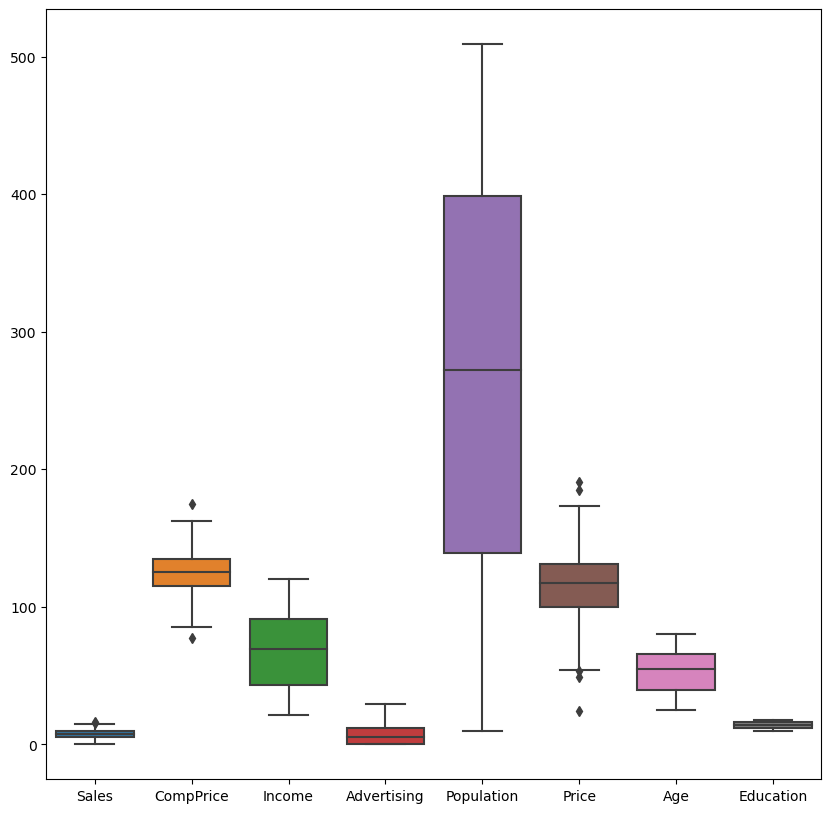

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(df)

# DATA ENCODING

In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])

### DATA TYPE CONVERSION

In [78]:
df['ShelveLoc'] = df['ShelveLoc'].astype('category')
df['Urban'] = df['Urban'].astype('category')
df['US'] = df['US'].astype('category')

In [79]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


# DATA VISUALIZATION

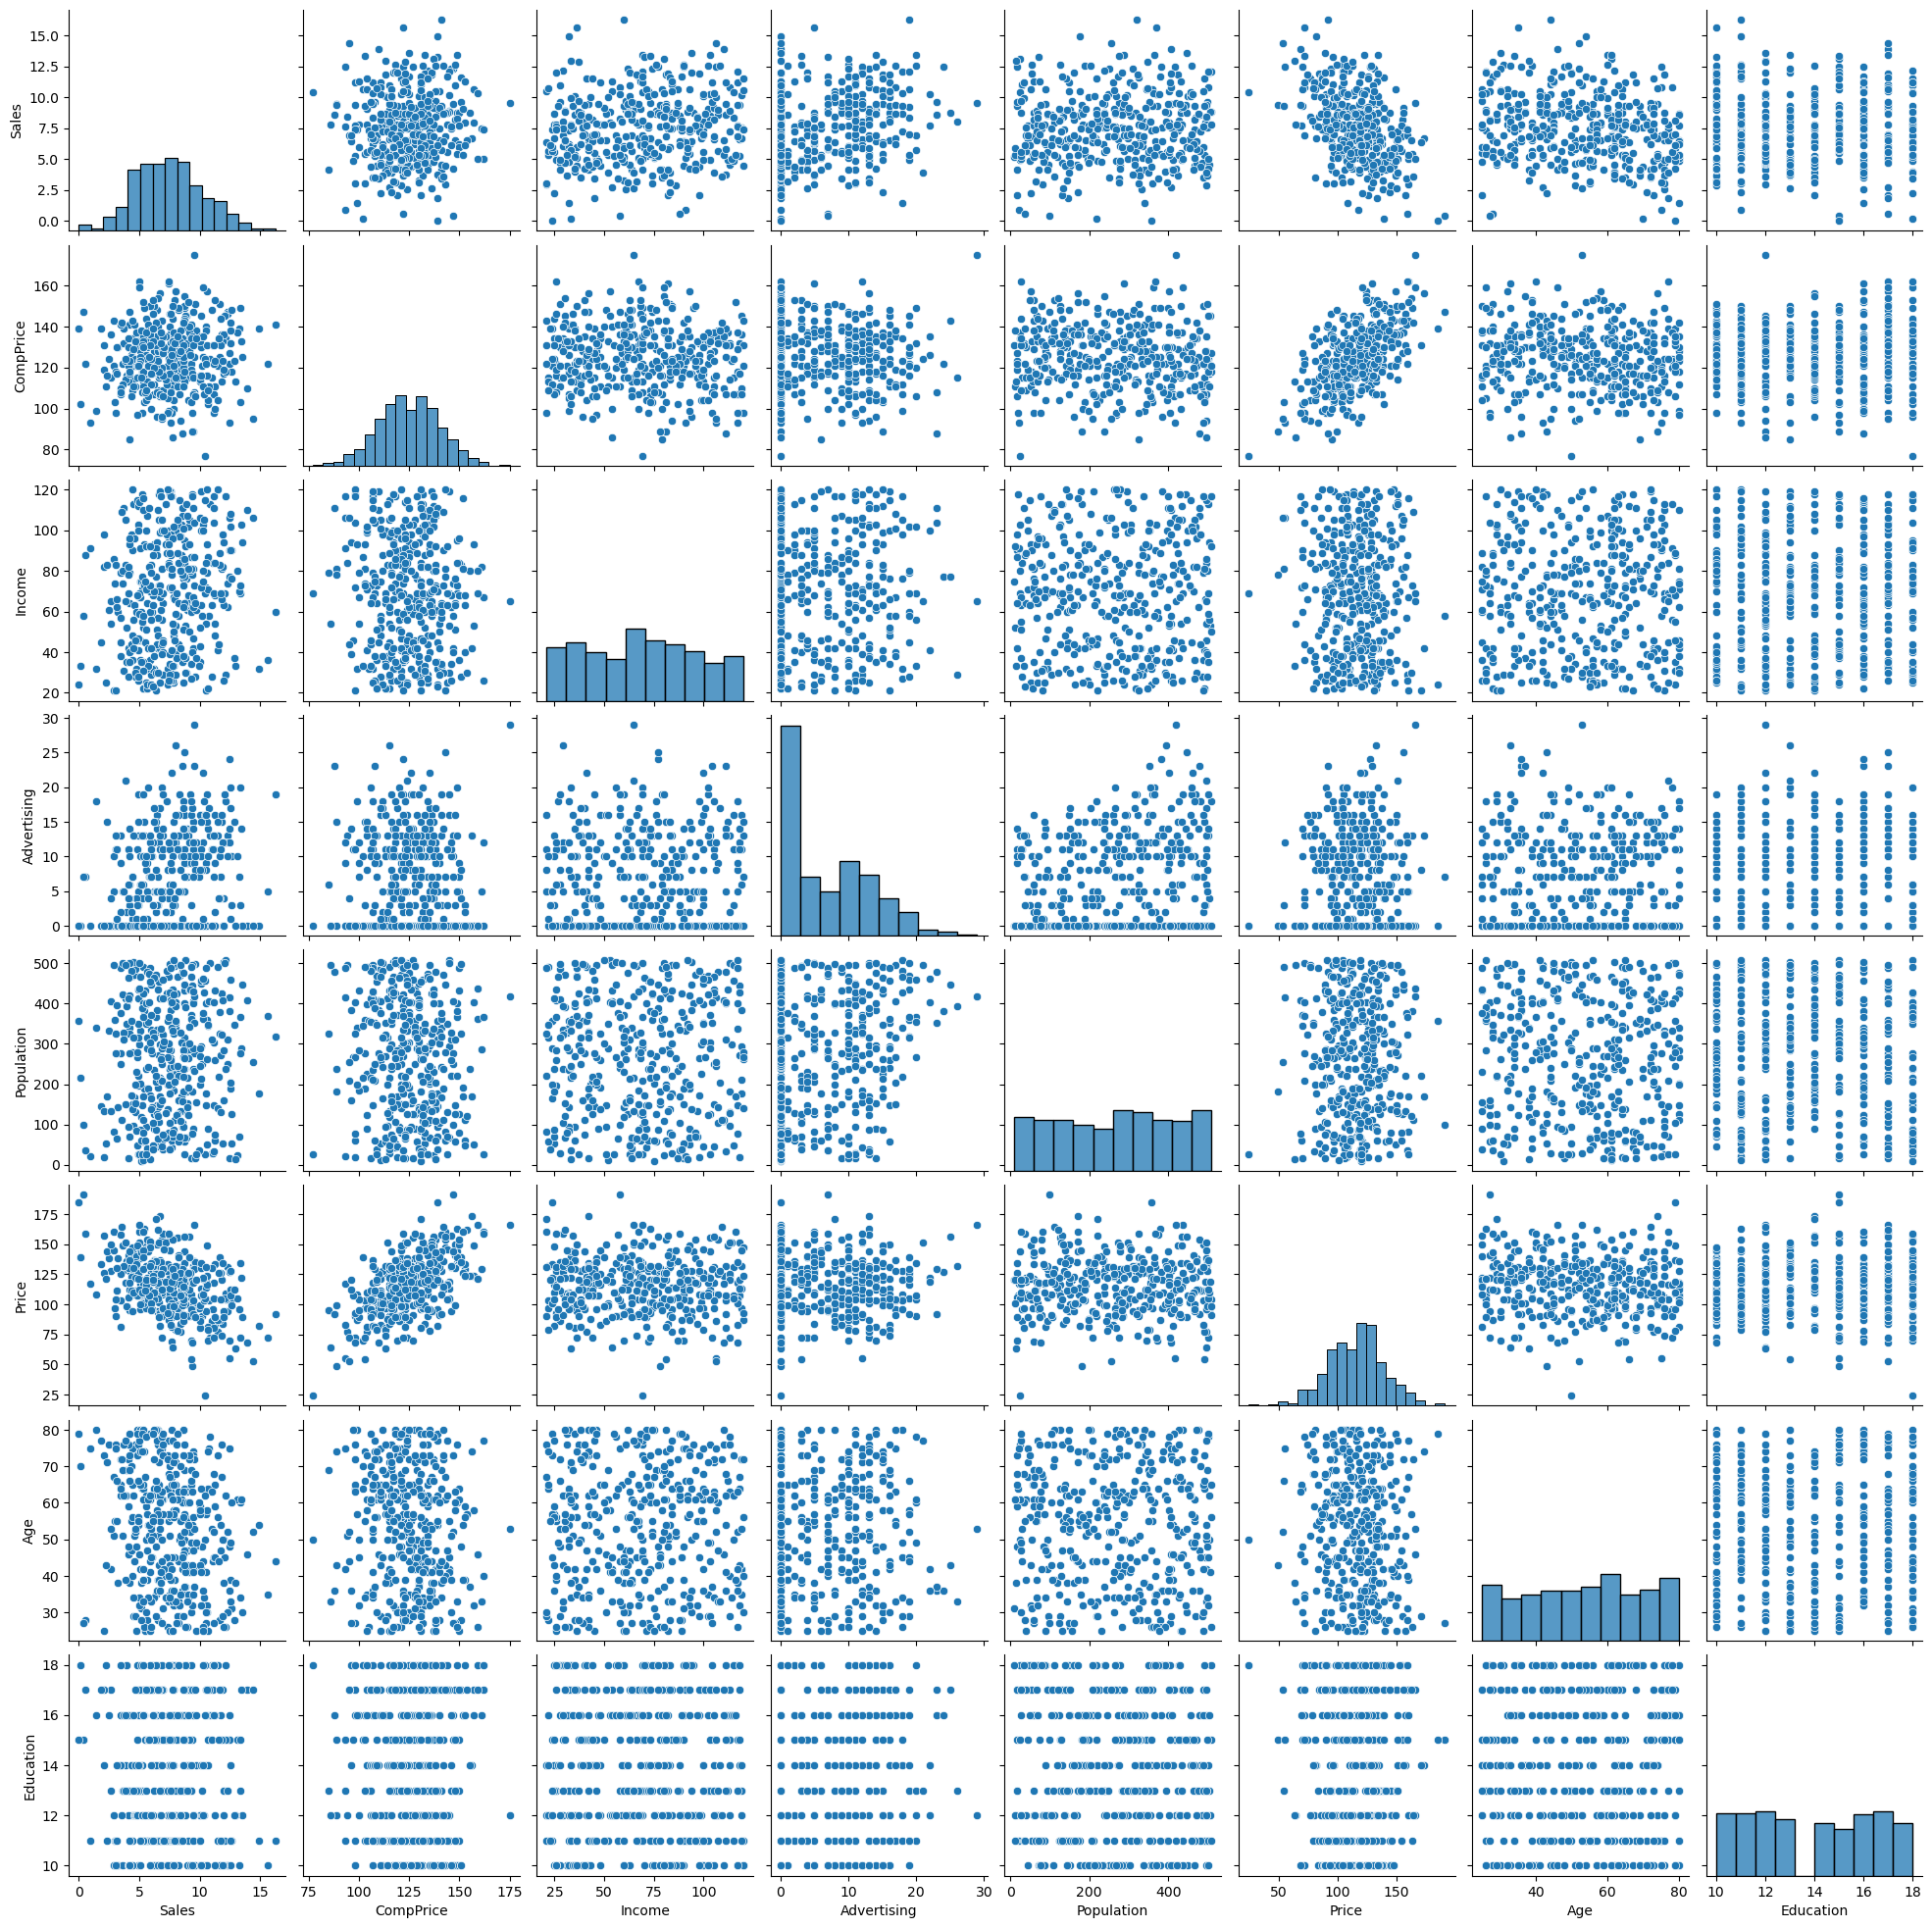

In [19]:
sns.pairplot(df)

<Axes: xlabel='Sales', ylabel='Income'>

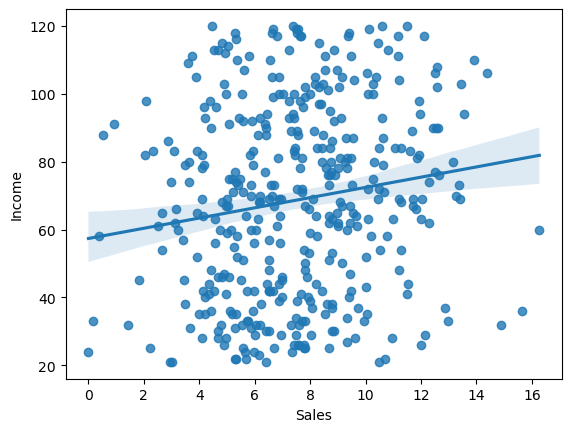

In [20]:
sns.regplot(df, x='Sales', y='Income')

IN ABOVE FIGURE:
1)The scatter plot shows a positive correlation between Income and Sales.
2)This means that, in general, as the Sales values increase, the Income values also tend to increase.

C:\Users\Admin\AppData\Local\Temp\ipykernel_6388\3718384398.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='magma', annot=True,fmt=".2f")


<Axes: >

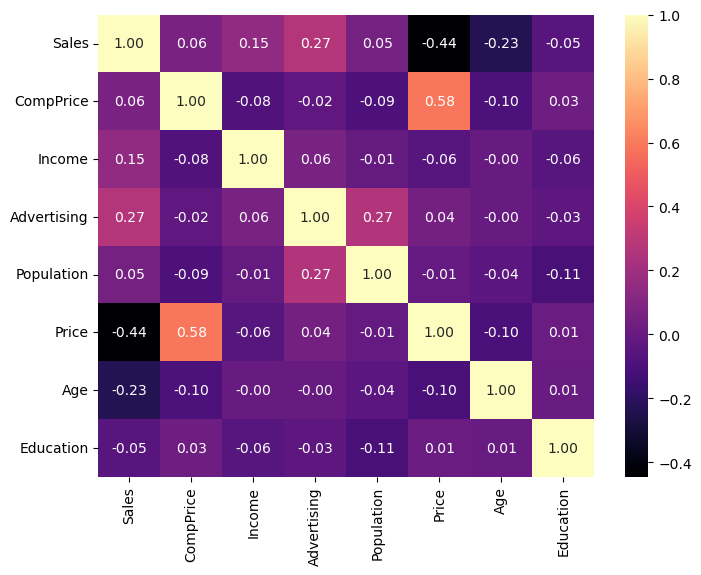

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='magma', annot=True,fmt=".2f")

<Axes: >

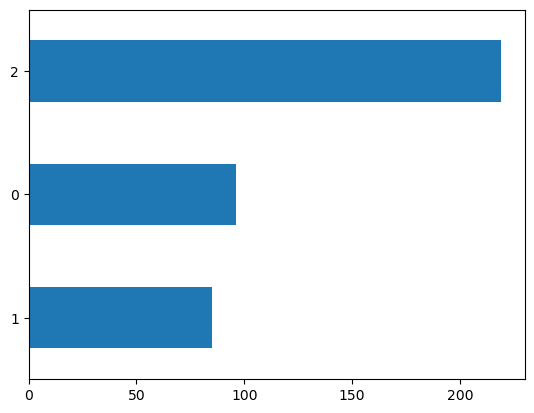

In [22]:
df.ShelveLoc.value_counts(ascending=True).plot(kind='barh')

In [23]:
pip install ppscore

Note: you may need to restart the kernel to use updated packages.


In [24]:
import ppscore as pps
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.215000,17.223333,DecisionTreeRegressor()
2,Sales,Income,0.000000,regression,True,mean absolute error,23.632500,30.317083,DecisionTreeRegressor()
3,Sales,Advertising,0.000000,regression,True,mean absolute error,5.730000,6.332500,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.045000,165.681250,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,US,ShelveLoc,0.000017,classification,True,weighted F1,0.387407,0.387417,DecisionTreeClassifier()
117,US,Age,0.000000,regression,True,mean absolute error,13.877500,13.956625,DecisionTreeRegressor()
118,US,Education,0.000000,regression,True,mean absolute error,2.285000,2.304601,DecisionTreeRegressor()
119,US,Urban,0.000000,classification,True,weighted F1,0.600000,0.583031,DecisionTreeClassifier()


In [25]:
pps.score(df,"Sales","Income")

{'x': 'Sales',
 'y': 'Income',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 23.6325,
 'model_score': 30.317083333333333,
 'model': DecisionTreeRegressor()}

For continous variable we are going to use Regressor for this dataset

# DATA SPLITTING

In [26]:
X=df.drop('Sales', axis=1)
y=df['Sales']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (320, 10)
Shape of X_test:  (80, 10)
Shape of y_train:  (320,)
Shape of y_test: (80,)


# MODEL SELECTION : DECISION TREE REGRESSOR

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dtregmodel = DecisionTreeRegressor()

In [82]:
dtregmodel.fit(X_train, y_train)

DecisionTreeRegressor()

In [83]:
y_pred = dtregmodel.predict(X_test)
y_pred

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.])

# MODEL EVALUATION

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.92075
Mean Squared Error (MSE): 6.45408
Root Mean Squared Error (RMSE): 2.5404881420703385
R-squared (R2): 0.34782256020021074


Create residual plot

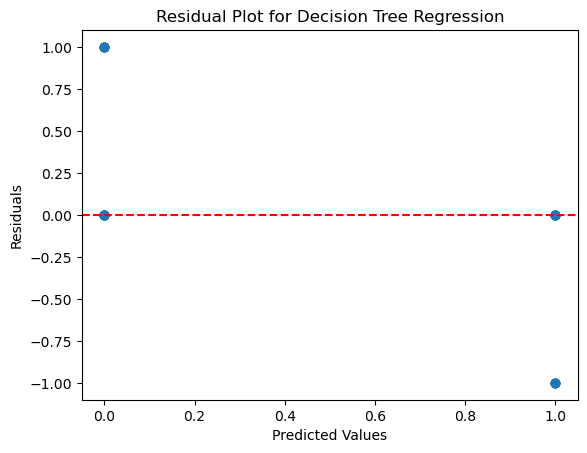

In [84]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Decision Tree Regression')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

In [36]:
from sklearn.tree import plot_tree

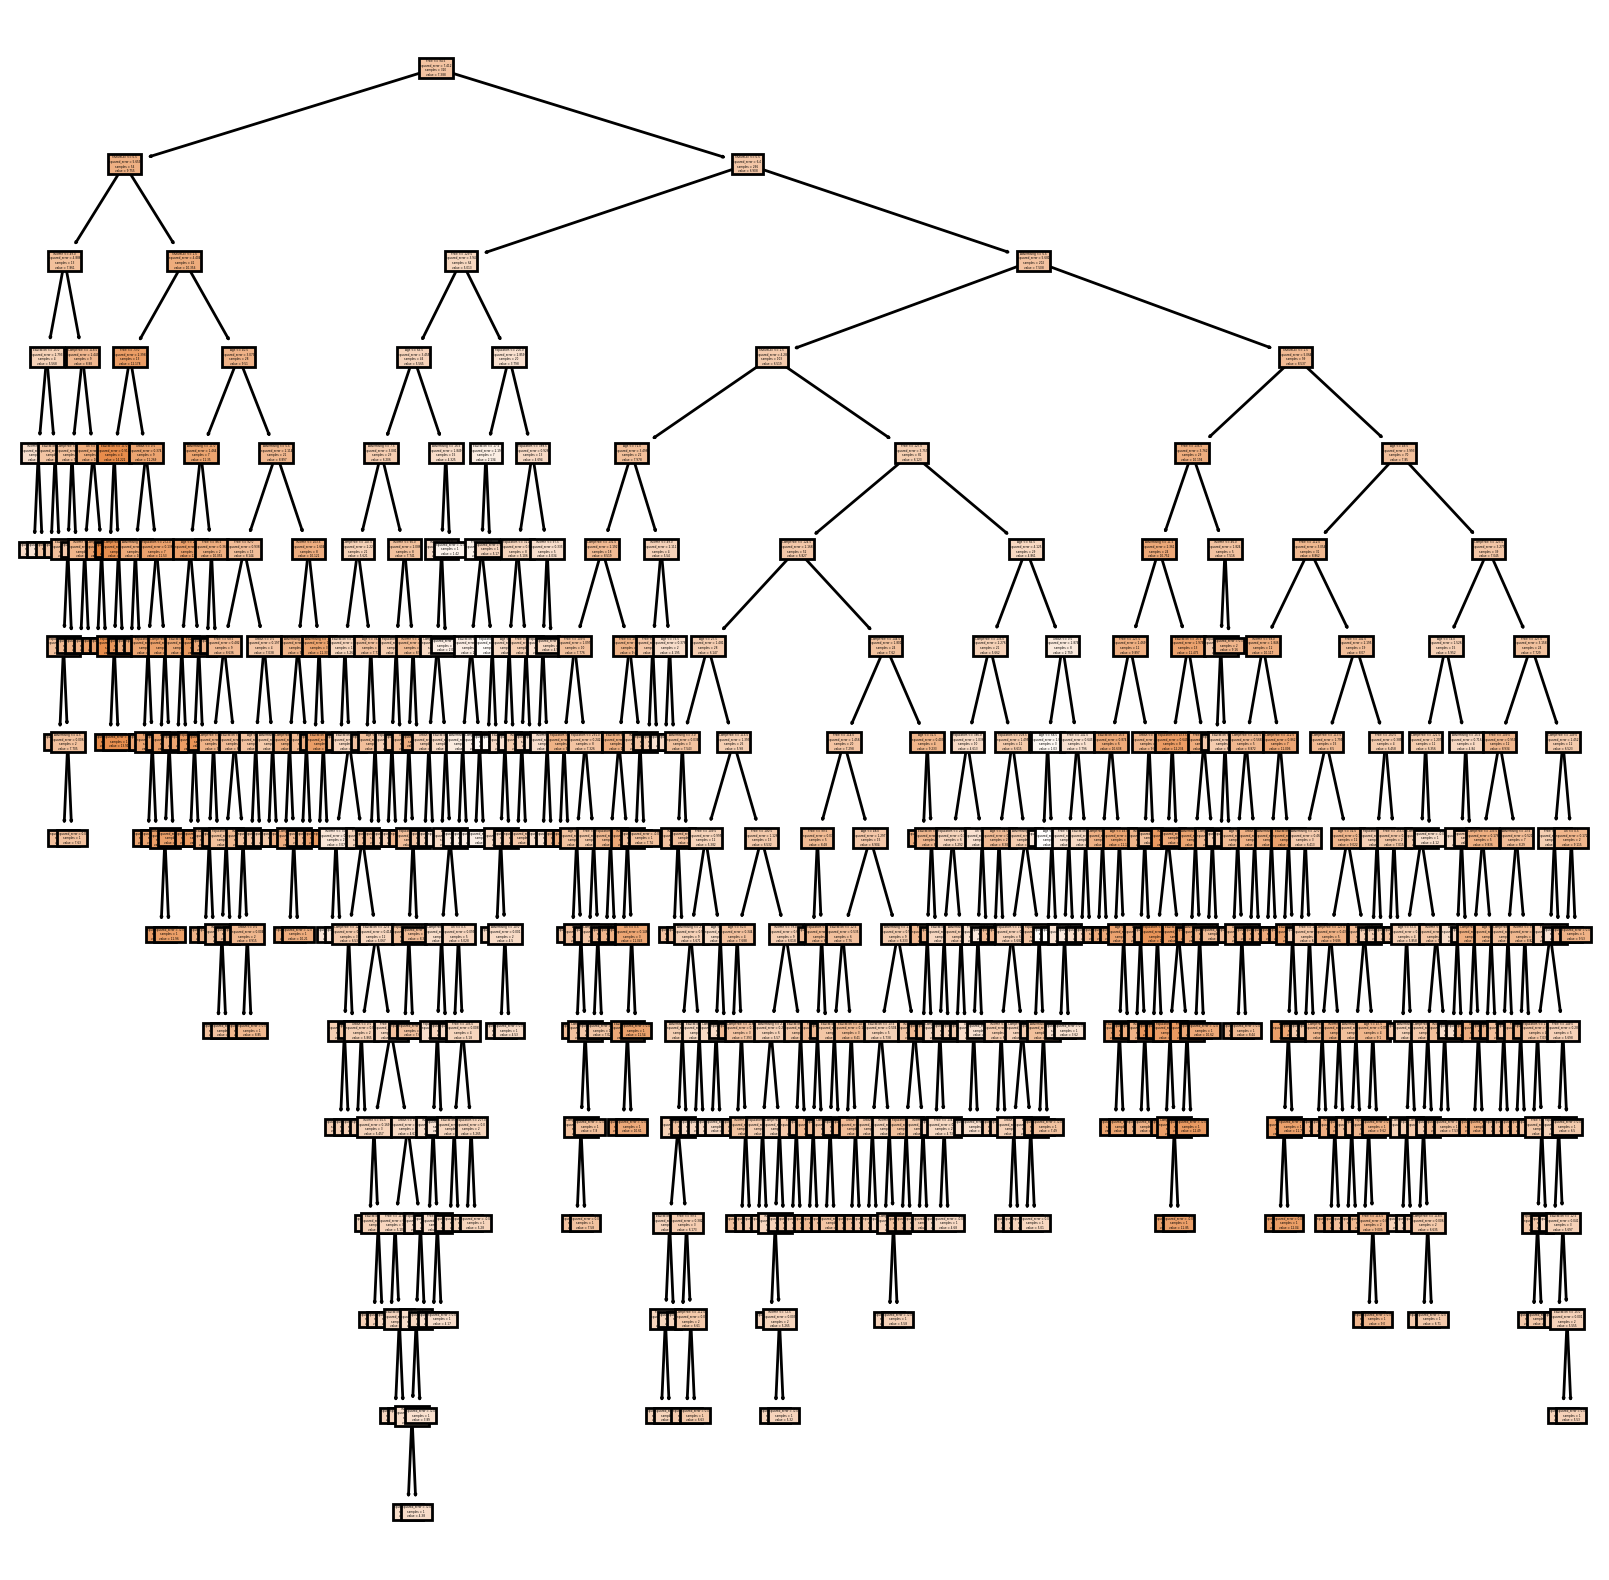

In [37]:
plt.figure(figsize=(10,10), dpi=200)
plot_tree(dtremodel,filled=True,feature_names=X.columns.tolist());

# CLASSIFICATION

In [38]:
df = pd.read_csv("Company_Data.csv")

In [39]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

### Converting Numerical Feature to Categorical

In [85]:
def Tagging(sale):
    if sale>= 7.5:
        return "High"
    else:
        return "Low"

In [86]:
df['Sales']=df['Sales'].apply(Tagging)

In [87]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Low,138,73,11,276,120,0,42,17,1,1
1,Low,111,48,16,260,83,1,65,10,1,1
2,Low,113,35,10,269,80,2,59,12,1,1
3,Low,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0


# ENCODING

In [88]:
Objectcol=df.select_dtypes(object).columns
Objectcol

Index(['Sales'], dtype='object')

In [89]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(dtype=int)

df[Objectcol]=oe.fit_transform(df[Objectcol])

In [90]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


# DATA SPLITTING

In [48]:
X = df.drop('Sales',axis=1)
y = df['Sales']


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (320, 10)
Shape of X_test:  (80, 10)
Shape of y_train:  (320,)
Shape of y_test: (80,)


 # MODEL SELECTION:  DECISION TREE CLASSIFIER

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
model = DecisionTreeClassifier()

In [94]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [95]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

# MODEL EVALUATION

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, make_scorer

In [96]:
accuracy_score(y_test, y_pred)

0.675

In [97]:
confusion_matrix(y_test, y_pred)

array([[31, 12],
       [14, 23]], dtype=int64)

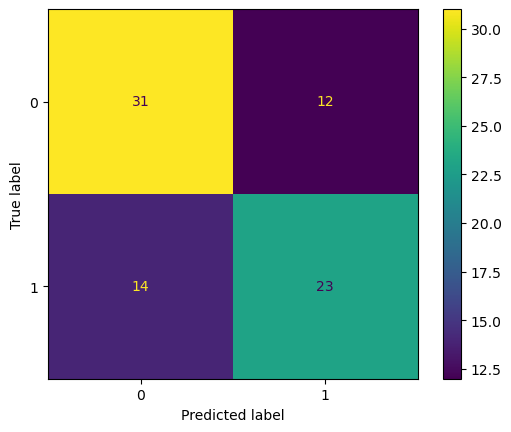

In [98]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        43
           1       0.66      0.62      0.64        37

    accuracy                           0.68        80
   macro avg       0.67      0.67      0.67        80
weighted avg       0.67      0.68      0.67        80



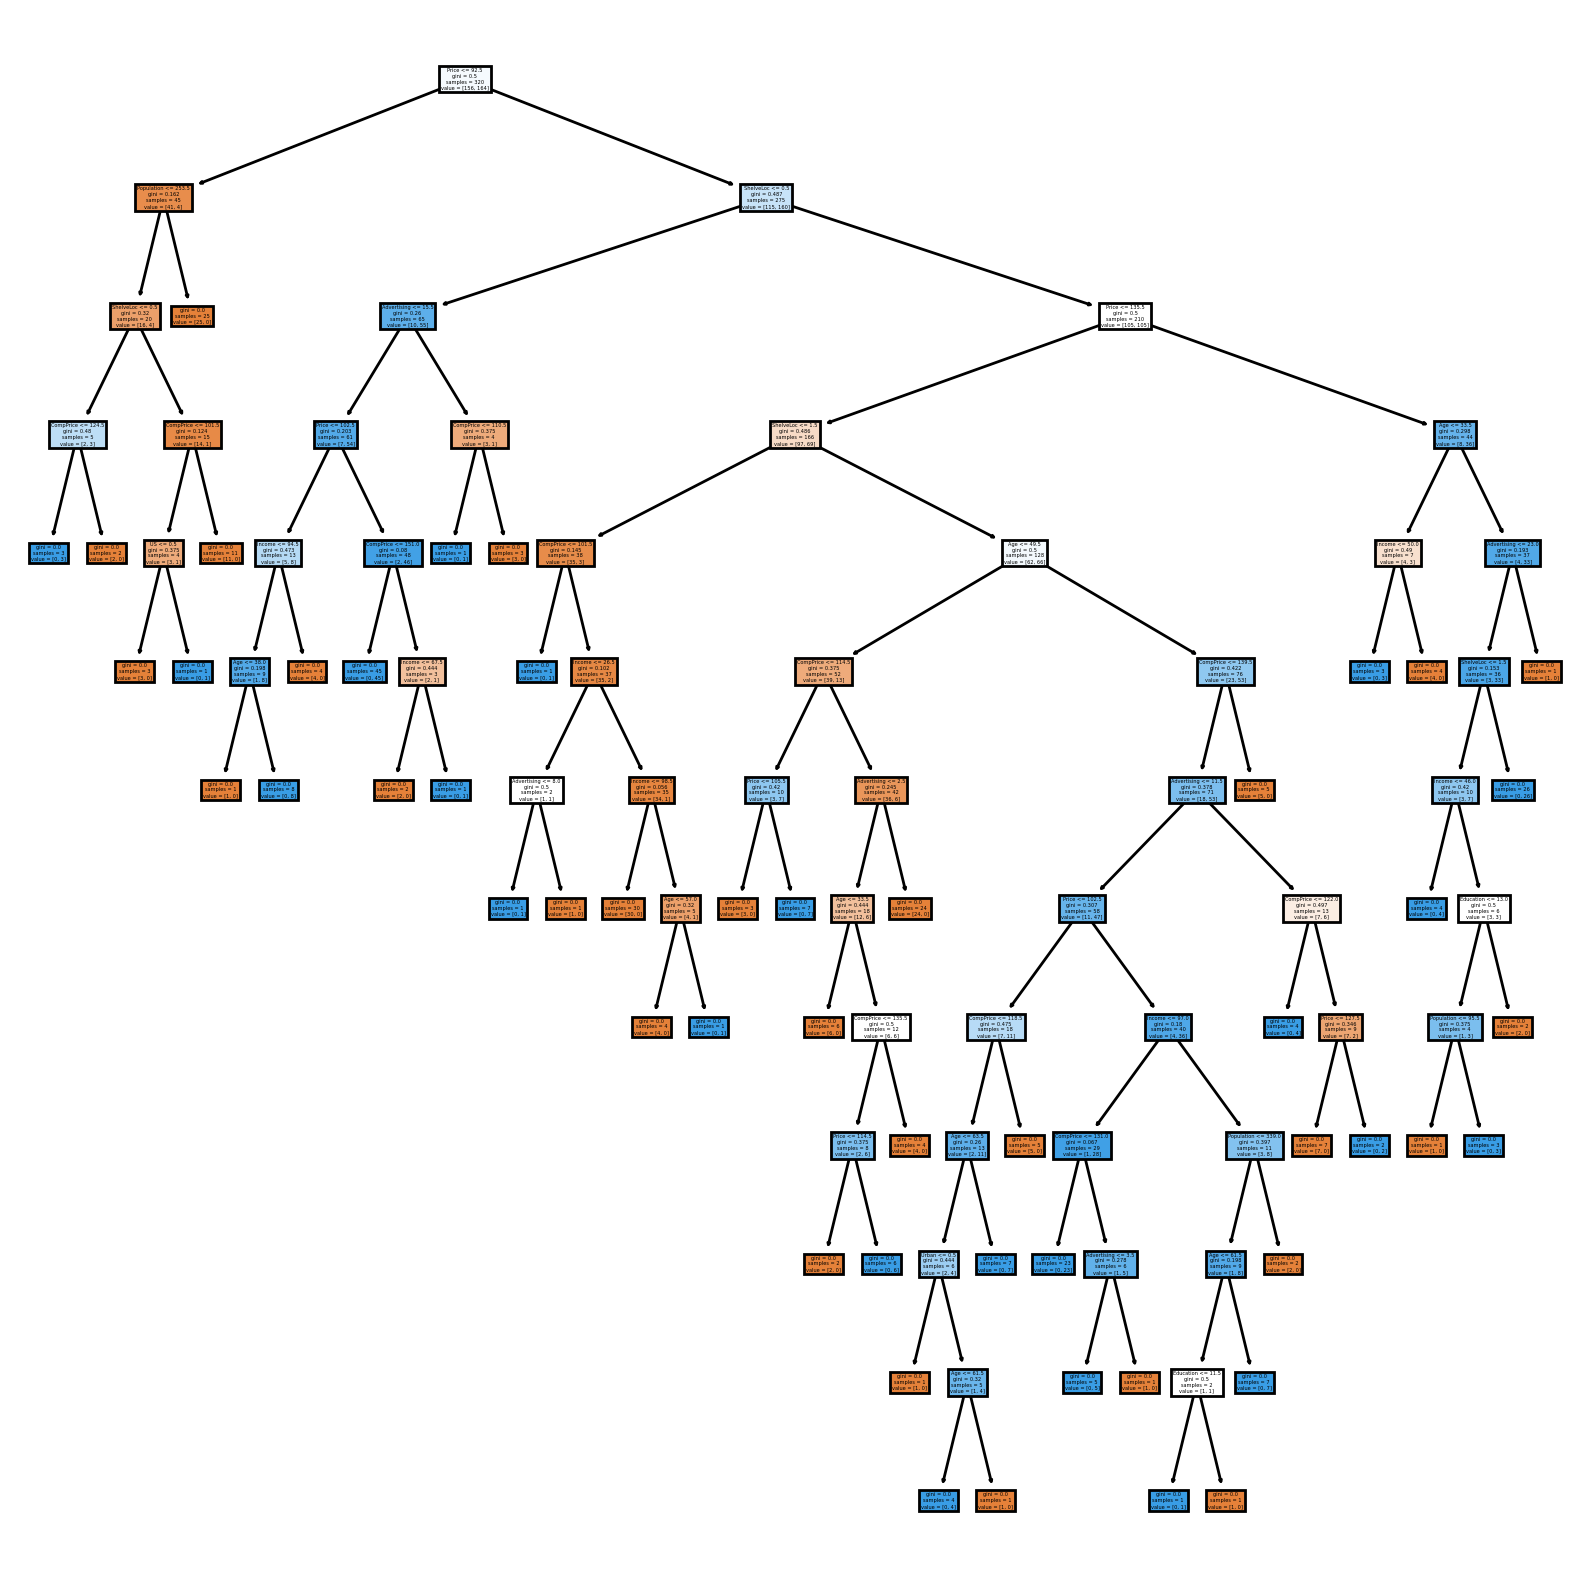

In [100]:
plt.figure(figsize=(10,10),dpi=200)
plot_tree(model, filled=True, feature_names=X.columns.tolist());

In [101]:
def report_model(model):
    """
    Generates and prints various reports to evaluate a trained model.
    Args:
        model: The trained model object.
    """

    # Make predictions on the test set
    model_preds = model.predict(X_test)

    # Calculate accuracy scores on training and test sets
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Print training and test accuracy scores
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    print()

    # Generate and print confusion matrix with annotations
    print("Confusion Matrix:")
    print(sns.heatmap(confusion_matrix(y_test, model_preds), annot=True))

    # Generate and print classification report
    print("Classification Report:")
    print(classification_report(y_test, model_preds))
    print()

    # Create a figure for plotting the decision tree
    plt.figure(figsize=(12, 8), dpi=150)

    # Plot the decision tree with filled nodes and feature names
    plot_tree(model, filled=True, feature_names=X.columns.tolist());

Training Accuracy: 0.8438
Test Accuracy: 0.7125

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        43
           1       0.68      0.73      0.70        37

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80




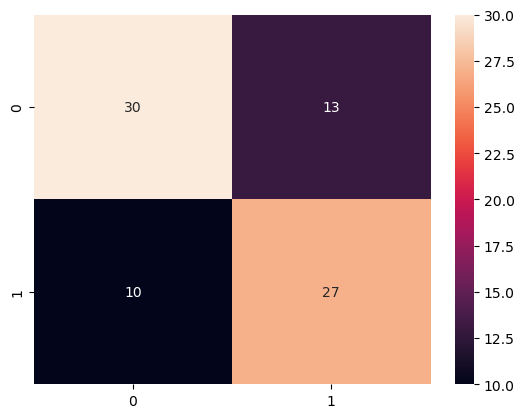

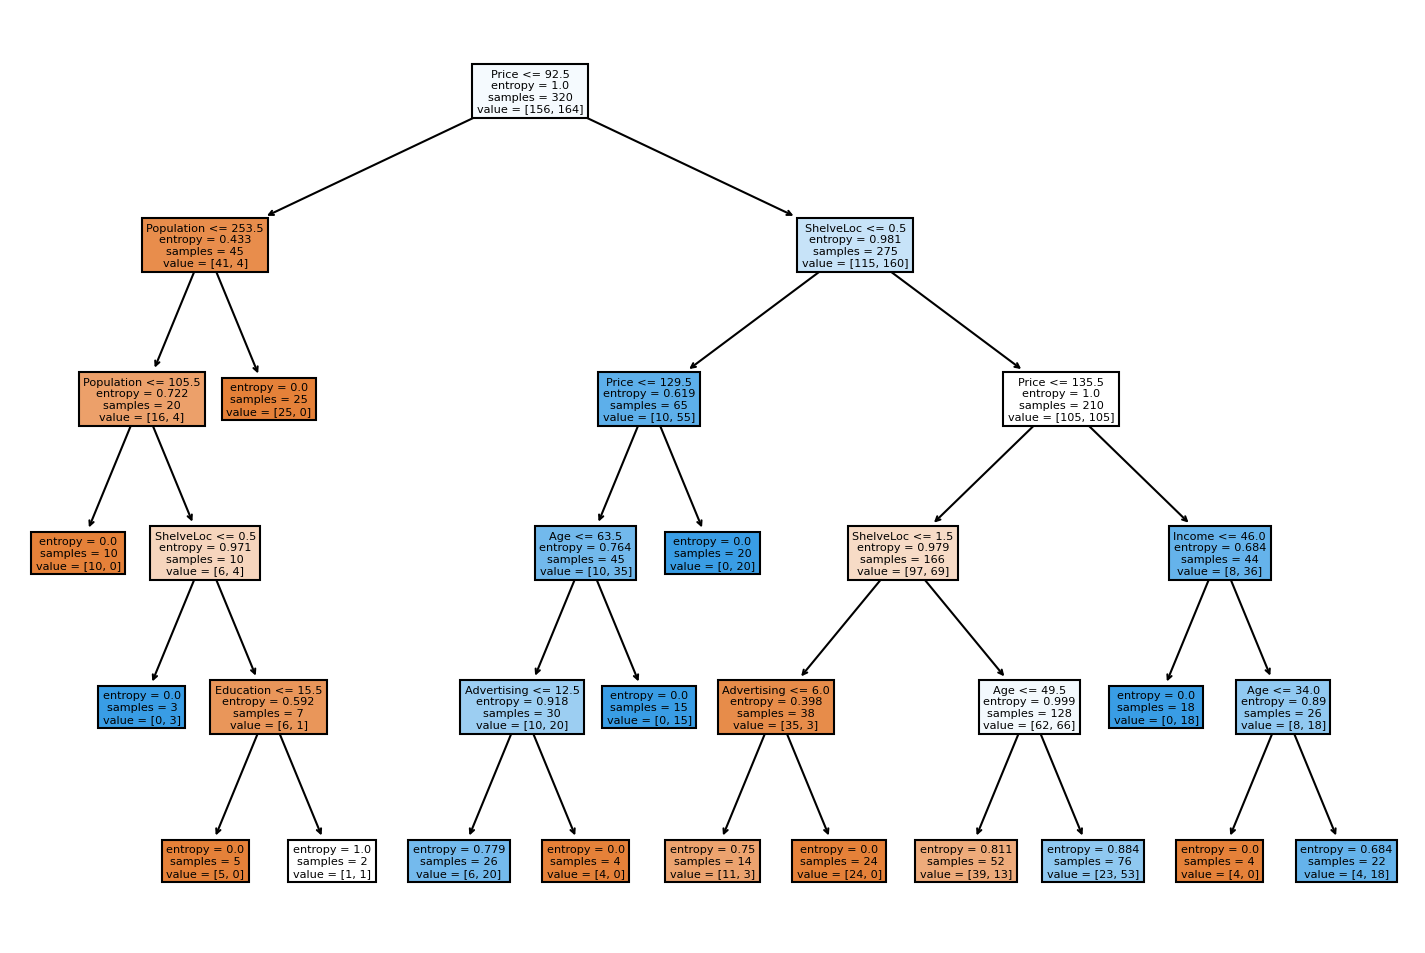

In [62]:
pruned_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

In [110]:
from sklearn.model_selection import GridSearchCV

In [112]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"] ,
              'max_depth': [5,6,7,8,9, 10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2,3]}


grid = GridSearchCV(dtc, param_grid, scoring=scorer, cv=10, n_jobs=-1, verbose=3)

In [114]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [115]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3)

Training Accuracy: 0.9437
Test Accuracy: 0.7500

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        43
           1       0.73      0.73      0.73        37

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80




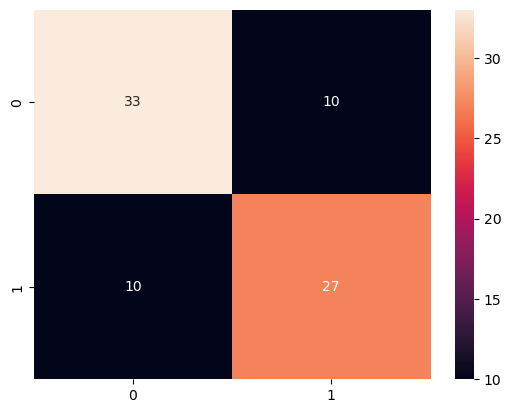

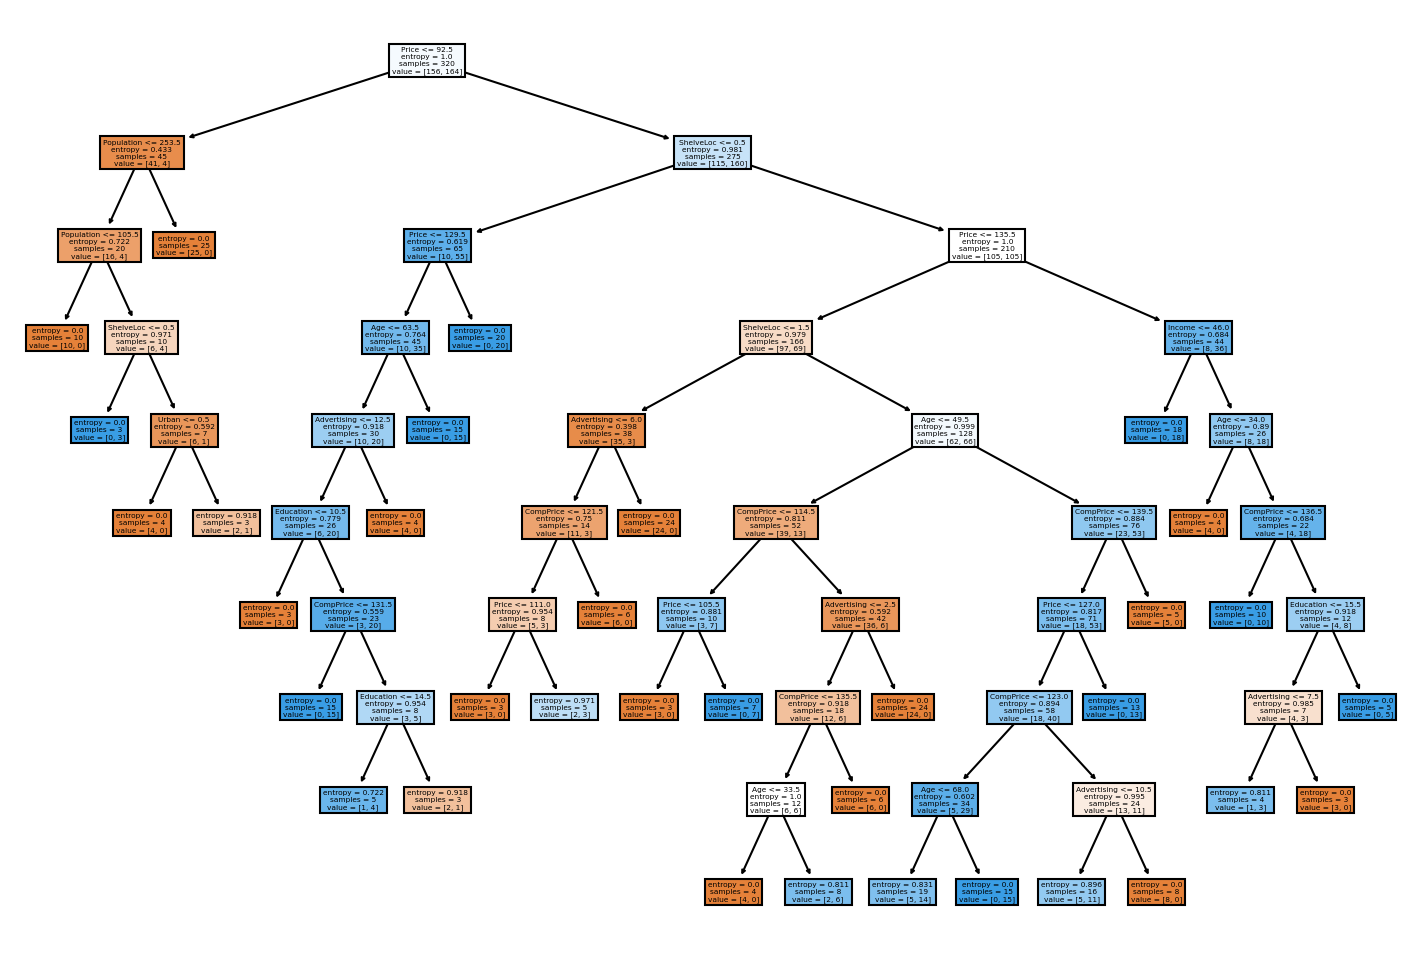

In [116]:
report_model(grid.best_estimator_)

In [117]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"] ,
              'max_leaf_nodes': [5,6,7,8,9, 10],
              'min_samples_split': [2, 5]}


grid = GridSearchCV(dtc, param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=3)

In [118]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [119]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

Training Accuracy: 0.8469
Test Accuracy: 0.7500

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        43
           1       0.73      0.73      0.73        37

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80




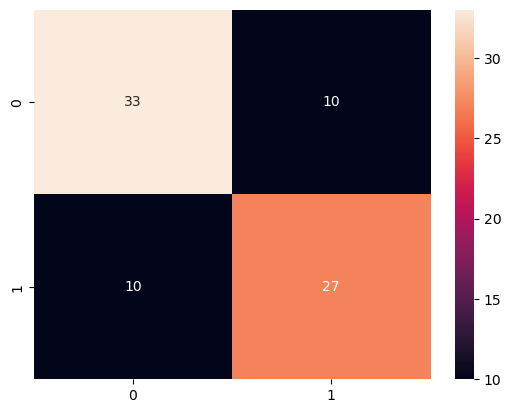

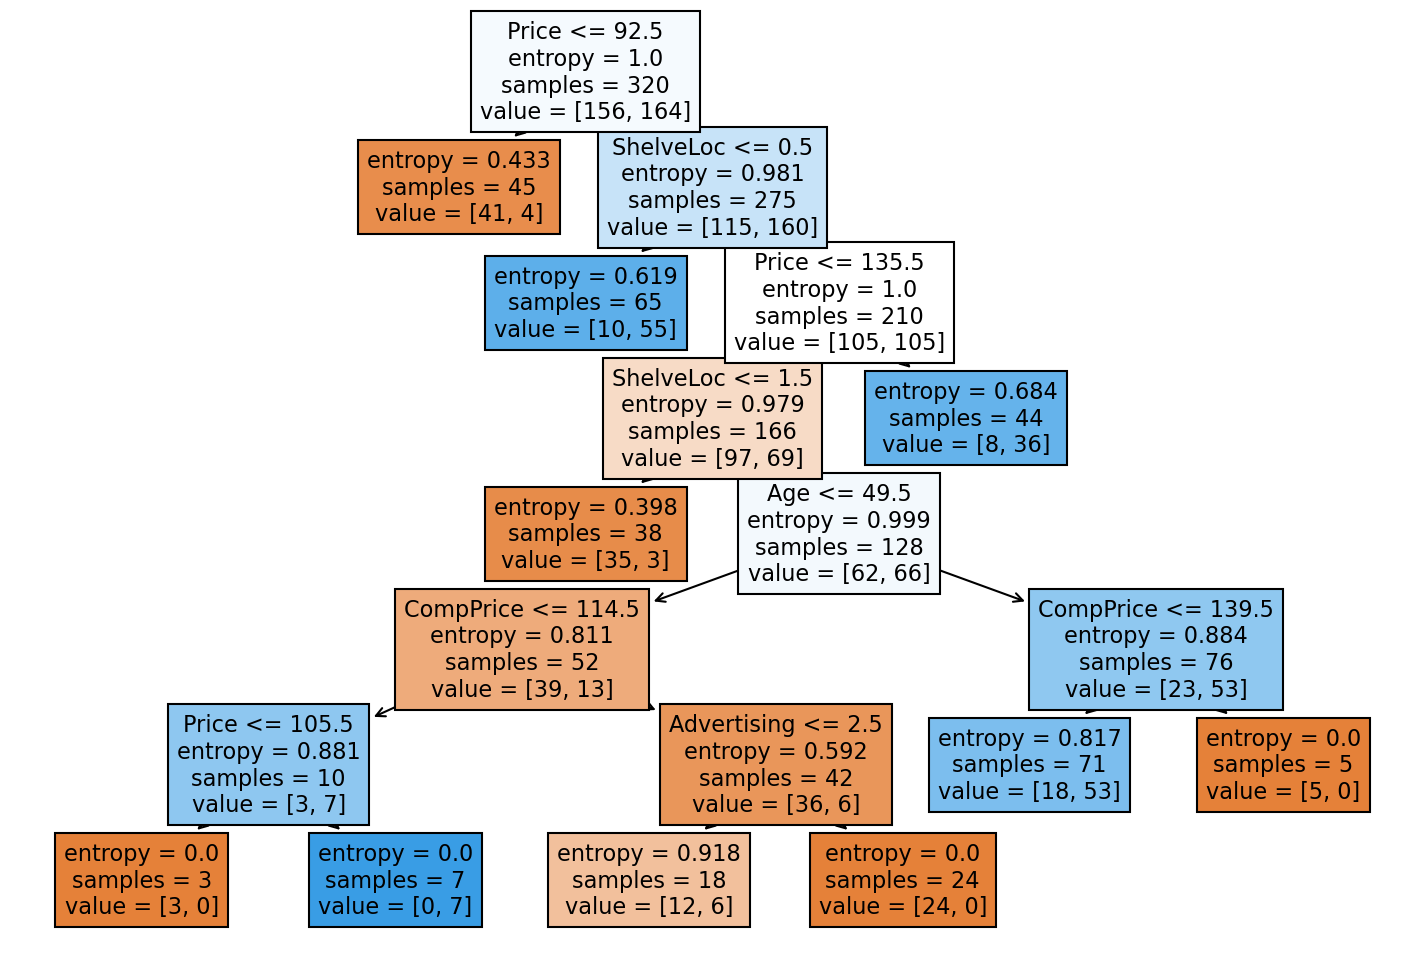

In [109]:
report_model(grid.best_estimator_)

Training Accuracy: 0.8469
Test Accuracy: 0.7500

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        43
           1       0.73      0.73      0.73        37

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80




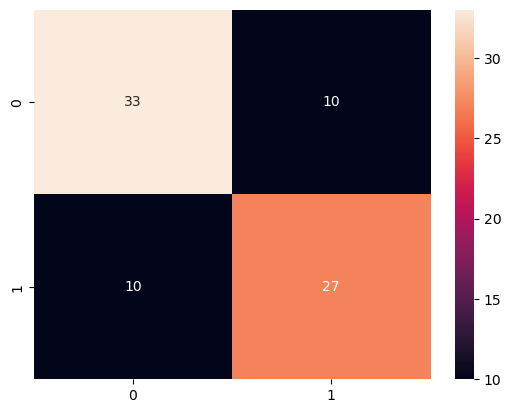

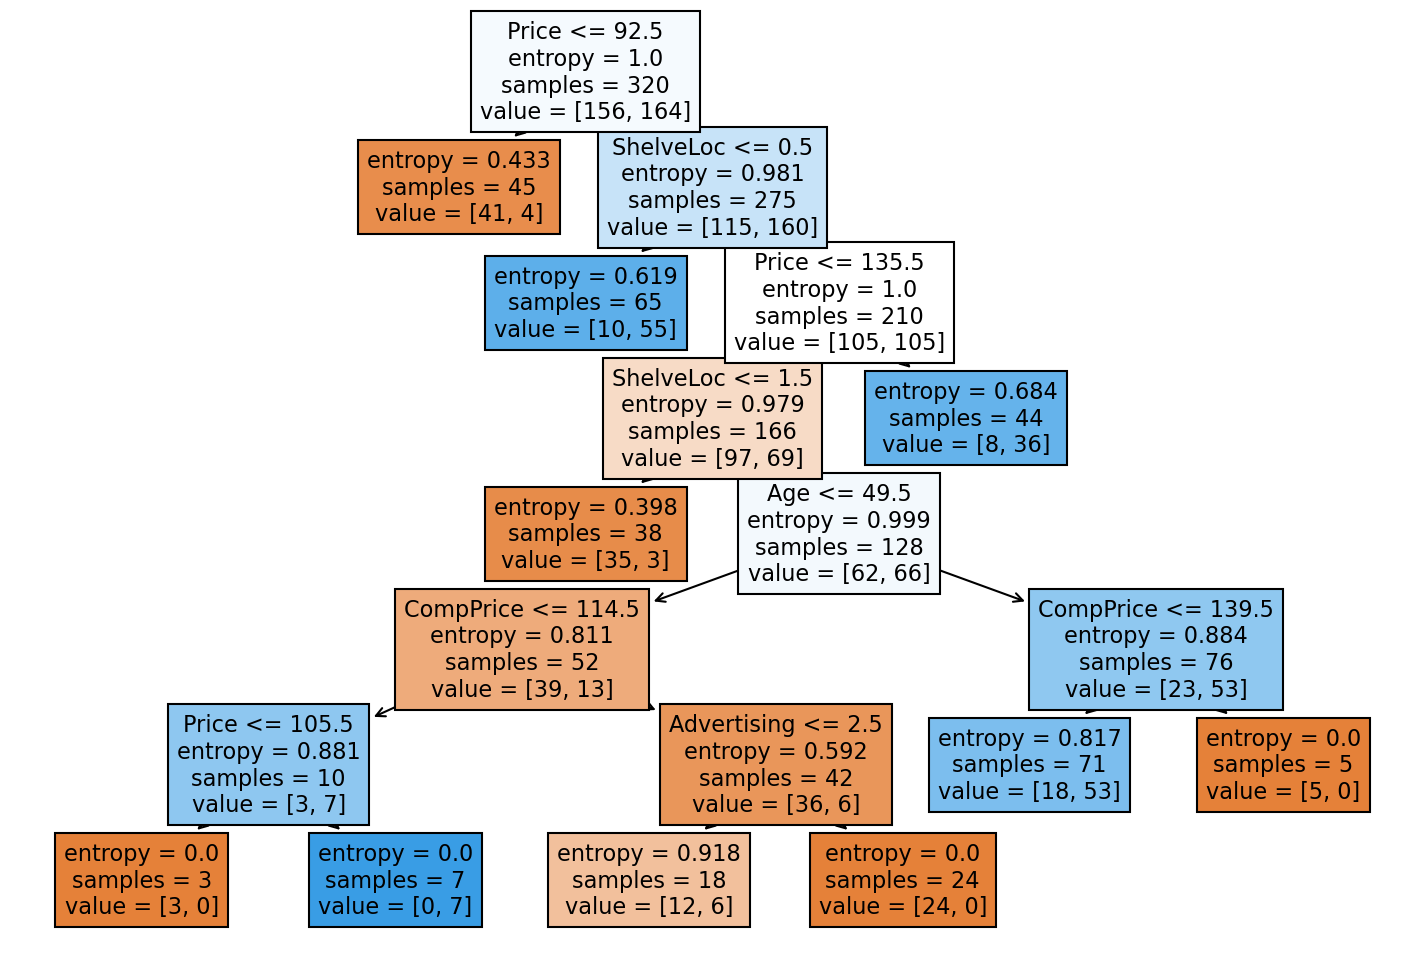

In [120]:
report_model(grid.best_estimator_)

# CROSS VALIDATION

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}

In [123]:
grid_model = GridSearchCV(estimator=dtregmodel, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [124]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [125]:
grid_model.best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [126]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_split=10)

In [127]:
grid_pred = grid_model.predict(X_test)

In [128]:
grid_pred

array([0.        , 1.        , 0.05405405, 1.        , 0.69736842,
       1.        , 0.        , 0.6       , 0.05405405, 0.05405405,
       0.69736842, 0.69736842, 0.        , 0.25      , 0.91666667,
       0.25      , 0.91666667, 0.        , 0.25      , 0.69736842,
       0.        , 0.91666667, 0.33333333, 0.69736842, 1.        ,
       0.69736842, 0.69736842, 0.        , 0.25      , 0.91666667,
       0.05405405, 0.05405405, 0.69736842, 1.        , 0.05405405,
       0.69736842, 1.        , 0.69736842, 0.05405405, 1.        ,
       0.25      , 0.91666667, 0.        , 0.        , 0.42857143,
       0.69736842, 0.69736842, 0.        , 0.91666667, 0.69736842,
       0.        , 0.25      , 0.25      , 1.        , 0.25      ,
       1.        , 0.69736842, 0.05405405, 0.        , 0.05405405,
       0.05405405, 0.05405405, 0.6       , 0.91666667, 0.25      ,
       0.25      , 0.05405405, 0.25      , 0.25      , 0.05405405,
       0.91666667, 0.25      , 0.        , 1.        , 0.6    

# RETRAIN MODEL

In [129]:
dtc_model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

In [130]:
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

Training Accuracy: 0.8469
Test Accuracy: 0.7500

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        43
           1       0.73      0.73      0.73        37

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80




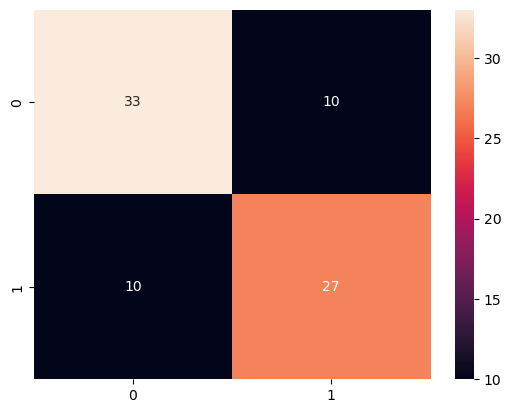

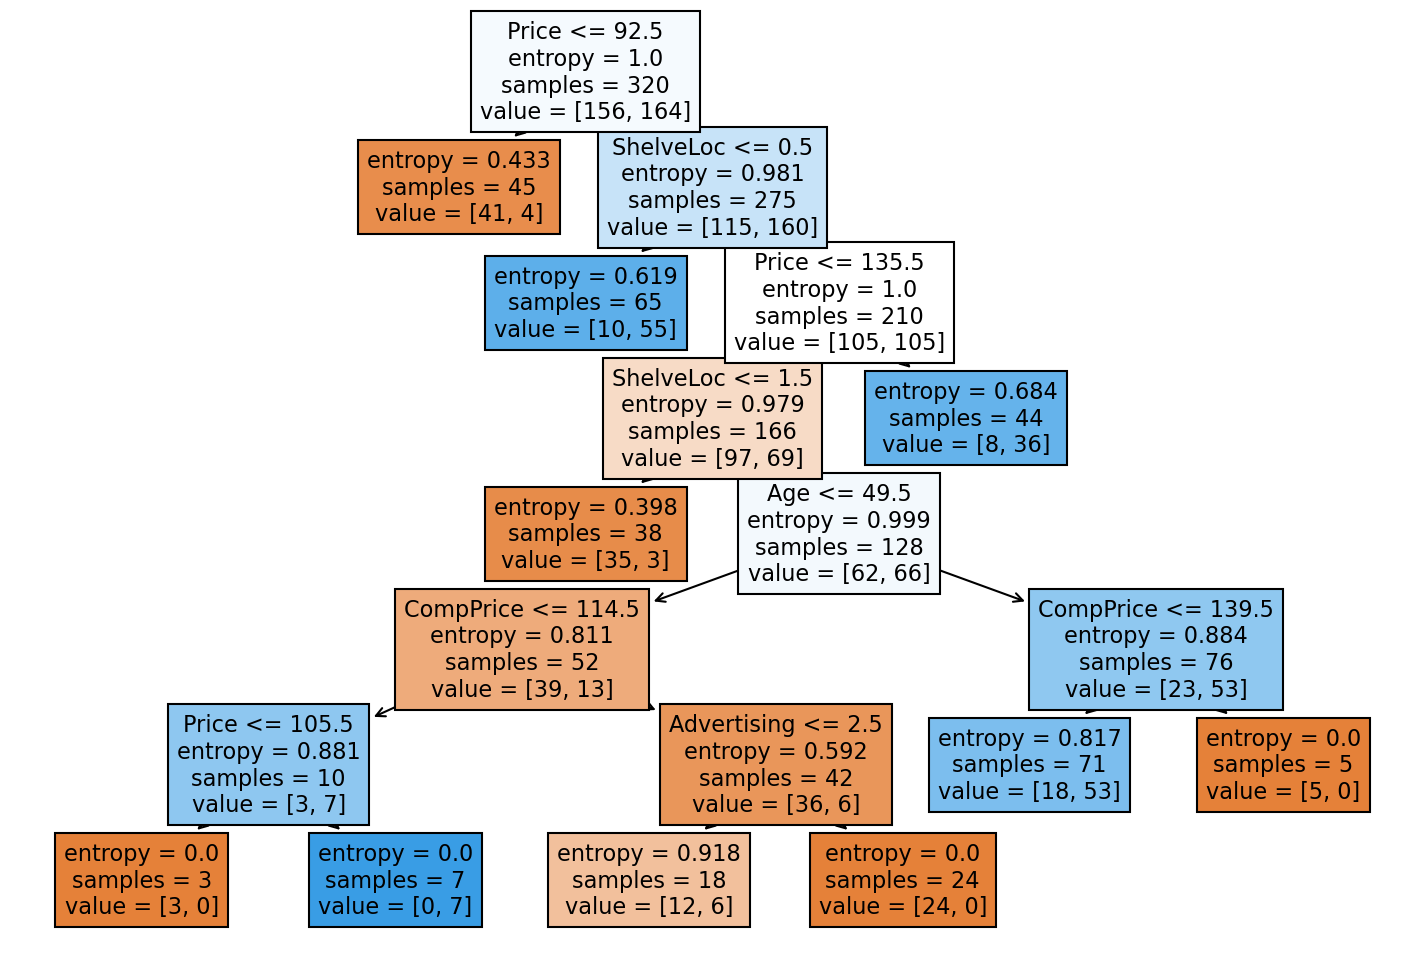

In [131]:
report_model(dtc_model)


# MODEL DEPLOYMENT

In [133]:
# from joblib import dump,load

In [134]:
# dump(dtc_model, 'dtc_model.joblib')